<a href="https://colab.research.google.com/github/dhanushkumar-amk/MENTAL-STRESS-PREDICTION-USING-DECISION-TREE-WITH-VISUAL/blob/main/MENTAL_STRESS_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRAINING DATASET (50 samples)
 Social_Media  Sleep_Hours  Exercise_Min  Workload Stress_Level
          9.0         11.6          13.2       9.2         High
         22.8          9.3         267.3       3.2         High
         17.6         11.3         132.0       2.3         High
         14.4         10.7         213.6       5.4         High
          3.7          7.2         381.2       9.9         High
          3.7         11.1         104.7       3.2         High
          1.4          1.1         172.4       7.0         High
         20.8          2.4         317.3       7.9         High
         14.4          0.5          96.1       3.1         High
         17.0          3.9          32.3       7.6         High
          0.5          4.7         121.7       4.3         High
         23.3          3.3          67.7       6.7         High
         20.0          9.9         390.5       6.7         High
          5.1          4.3         339.4       5.8         High
          

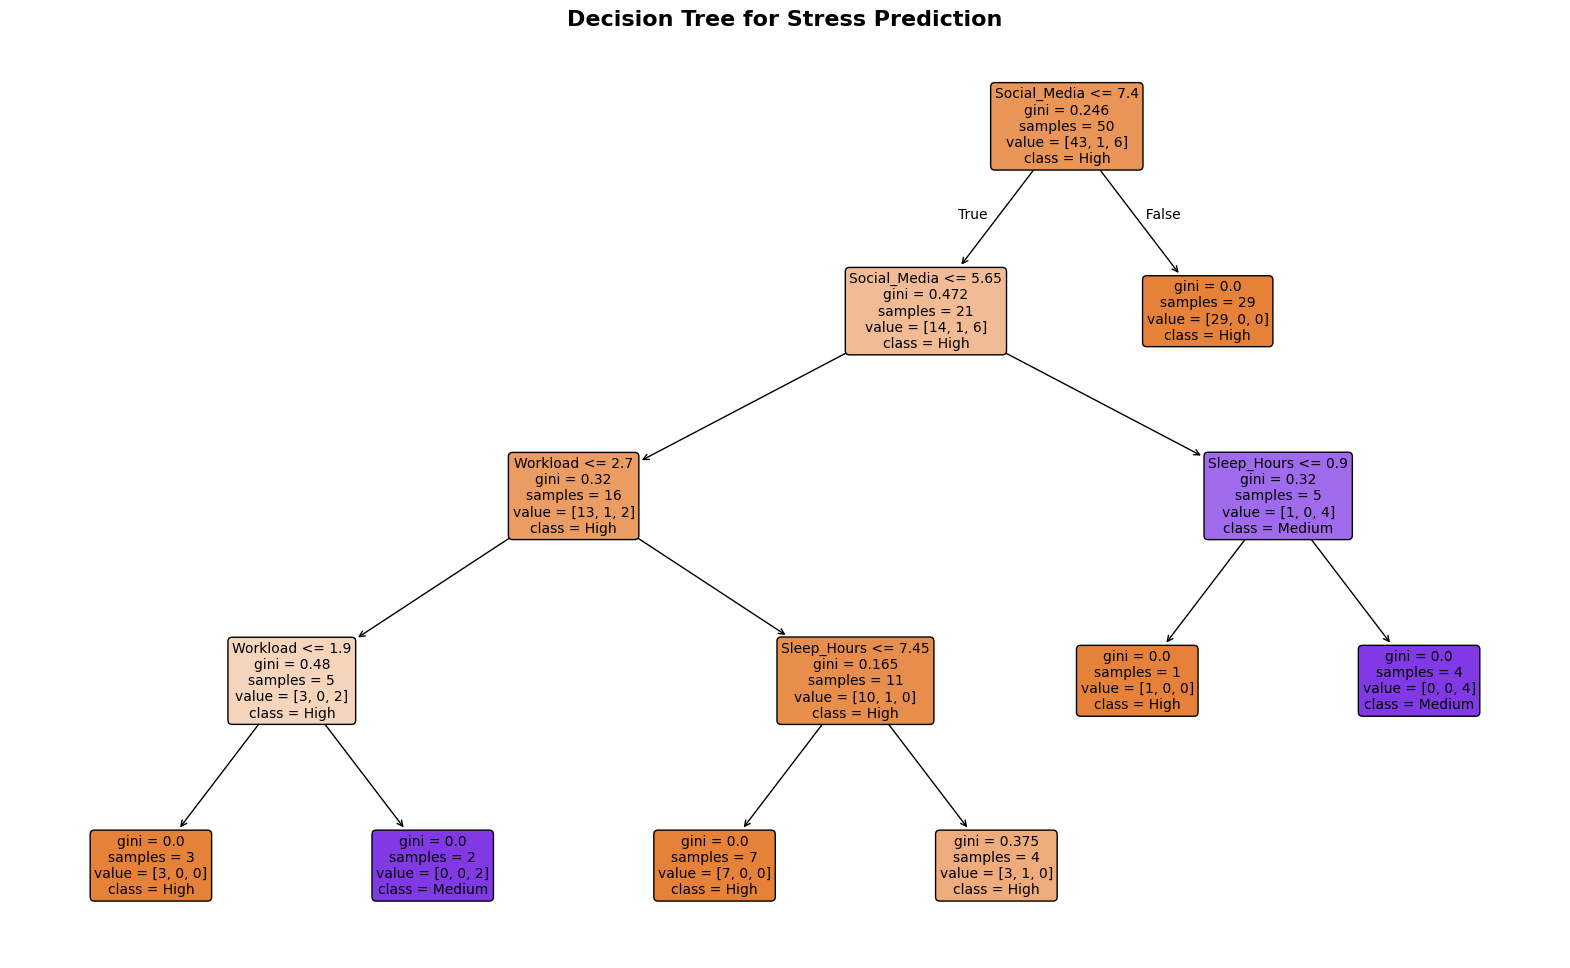


COMMAND USAGE EXAMPLES
Use this command to make predictions:
predict_stress_command(social_media_hours, sleep_hours, exercise_minutes, workload_intensity)

Examples:
predict_stress_command(10, 4, 30, 9)    # High stress example
predict_stress_command(3, 7, 200, 5)    # Medium stress example
predict_stress_command(1, 8, 300, 2)    # Low stress example

TESTING COMMANDS
Input: Social_Media=10, Sleep=4, Exercise=30, Workload=9
Predicted Stress Level: High
Input: Social_Media=3, Sleep=7, Exercise=200, Workload=5
Predicted Stress Level: High
Input: Social_Media=1, Sleep=8, Exercise=300, Workload=2
Predicted Stress Level: Medium


'Medium'

In [6]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import warnings

# Suppress user warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Set random seed
np.random.seed(42)

# Generate 50 training samples
def create_training_data():
    social_media = np.random.uniform(0, 24, 50)
    sleep_hours = np.random.uniform(0, 12, 50)
    exercise_minutes = np.random.uniform(0, 420, 50)
    workload_intensity = np.random.uniform(1, 10, 50)

    stress_labels = []
    for i in range(50):
        score = 0
        if social_media[i] > 8: score += 2
        if sleep_hours[i] < 5 or sleep_hours[i] > 9: score += 2
        if exercise_minutes[i] < 60: score += 1
        if workload_intensity[i] > 7: score += 2
        score += np.random.normal(0, 0.5)

        if score >= 2: stress_labels.append('High')
        elif score >= 0: stress_labels.append('Medium')
        else: stress_labels.append('Low')

    return pd.DataFrame({
        'Social_Media': np.round(social_media, 1),
        'Sleep_Hours': np.round(sleep_hours, 1),
        'Exercise_Min': np.round(exercise_minutes, 1),
        'Workload': np.round(workload_intensity, 1),
        'Stress_Level': stress_labels
    })

# Generate 50 test samples
def create_test_data():
    return pd.DataFrame({
        'Social_Media': np.round(np.random.uniform(0, 24, 50), 1),
        'Sleep_Hours': np.round(np.random.uniform(0, 12, 50), 1),
        'Exercise_Min': np.round(np.random.uniform(0, 420, 50), 1),
        'Workload': np.round(np.random.uniform(1, 10, 50), 1)
    })

# Create datasets
train_data = create_training_data()
test_data = create_test_data()

# Train decision tree
X_train = train_data[['Social_Media', 'Sleep_Hours', 'Exercise_Min', 'Workload']]
y_train = train_data['Stress_Level']

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Make predictions on test data
test_predictions = dt.predict(test_data)
test_data['Predicted_Stress'] = test_predictions

# Display datasets in tabular format
print("="*80)
print("TRAINING DATASET (50 samples)")
print("="*80)
print(train_data.to_string(index=False))

print("\n" + "="*80)
print("TEST DATASET WITH PREDICTIONS (50 samples)")
print("="*80)
print(test_data.to_string(index=False))

# Create decision tree graph
plt.figure(figsize=(20, 12))
plot_tree(dt,
          feature_names=['Social_Media', 'Sleep_Hours', 'Exercise_Min', 'Workload'],
          class_names=['High', 'Low', 'Medium'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree for Stress Prediction', fontsize=16, fontweight='bold')
plt.show()

# Command function for predictions
def predict_stress_command(social_media, sleep, exercise, workload):
    """
    Command to predict stress level
    Usage: predict_stress_command(social_media_hours, sleep_hours, exercise_minutes, workload_intensity)
    """
    prediction = dt.predict([[social_media, sleep, exercise, workload]])[0]
    print(f"Input: Social_Media={social_media}, Sleep={sleep}, Exercise={exercise}, Workload={workload}")
    print(f"Predicted Stress Level: {prediction}")
    return prediction

print("\n" + "="*80)
print("COMMAND USAGE EXAMPLES")
print("="*80)
print("Use this command to make predictions:")
print("predict_stress_command(social_media_hours, sleep_hours, exercise_minutes, workload_intensity)")
print("\nExamples:")
print("predict_stress_command(10, 4, 30, 9)    # High stress example")
print("predict_stress_command(3, 7, 200, 5)    # Medium stress example")
print("predict_stress_command(1, 8, 300, 2)    # Low stress example")

# Test the command
print("\n" + "="*50)
print("TESTING COMMANDS")
print("="*50)
predict_stress_command(10, 4, 30, 9)
predict_stress_command(3, 7, 200, 5)
predict_stress_command(1, 8, 300, 2)

🔹 Generated Dataset with 50 Records:
    social_media_use  sleep  exercise  workload stress_level
0                  3      9         4         5          Low
1                  4      5         0         7       Medium
2                  2      5         0         7       Medium
3                  4      4         0         4       Medium
4                  4      5         0         7       Medium
5                  1      8         3         3          Low
6                  2      5         2         6       Medium
7                  2      7         2         2       Medium
8                  2      7         0        10       Medium
9                  4      7         2         9       Medium
10                 3      7         2         5       Medium
11                 2      8         0         6       Medium
12                 5      6         2         4       Medium
13                 4      9         4        10          Low
14                 1      4         1         7 

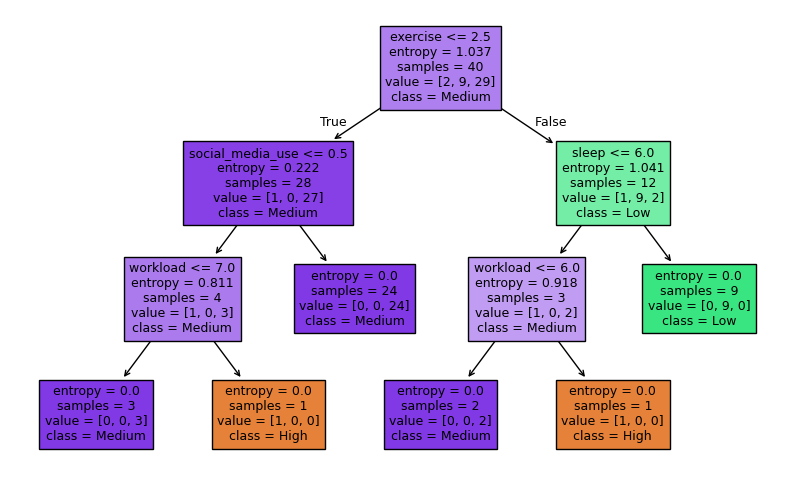

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Generate synthetic dataset (50 samples)
np.random.seed(42)

data = {
    "social_media_use": np.random.randint(0, 6, 50),   # 0–5 hours/day
    "sleep": np.random.randint(4, 10, 50),             # 4–9 hours/day
    "exercise": np.random.randint(0, 6, 50),           # 0–5 hours/day
    "workload": np.random.randint(1, 11, 50)           # 1–10 scale
}

df = pd.DataFrame(data)

# Step 2: Define stress level (target)
# Simple rules for generating labels:
# - High workload + low sleep = High stress
# - Good sleep + regular exercise = Low stress
# - Otherwise = Medium stress

stress = []
for i in range(len(df)):
    if df.loc[i, "workload"] > 7 and df.loc[i, "sleep"] < 6:
        stress.append("High")
    elif df.loc[i, "exercise"] >= 3 and df.loc[i, "sleep"] >= 7:
        stress.append("Low")
    else:
        stress.append("Medium")

df["stress_level"] = stress

print("🔹 Generated Dataset with 50 Records:")
print(df)

# Step 3: Split data
X = df[["social_media_use", "sleep", "exercise", "workload"]]
y = df["stress_level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test)
print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Visualize Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, fontsize=9)
plt.show()
